# Persiapan

Import Library

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Import data dalam format CSV

In [20]:
# Membaca data CSV
data = pd.read_csv('Salary_Data.csv')
# Melihat 5 data pertama
print(data.head())

   YearsExperience  Salary
0              1.1   59343
1              1.3   56205
2              1.5   47731
3              2.0   43525
4              2.2   39891


In [21]:
data.rename(columns={'YearsExperience': 'X', 'Salary': 'Y' }, inplace=True)
print(data)

       X       Y
0    1.1   59343
1    1.3   56205
2    1.5   47731
3    2.0   43525
4    2.2   39891
5    2.9   56642
6    3.0   60150
7    3.2   54445
8    3.2   64445
9    3.7   57189
10   3.9   63218
11   4.0   55794
12   4.0   56957
13   4.1   57081
14   4.5   61111
15   4.9   67938
16   5.1   66029
17   5.3   83088
18   5.9   81363
19   6.0   93940
20   6.8   91738
21   7.1   98273
22   7.9  131302
23   8.2  153812
24   8.7  159431
25   9.0  145582
26   9.5  166969
27   9.6  172635
28  10.3  192391
29  10.5  232872


# Analisis

Menghitung matriks korelasi

In [22]:
# Menghitung matriks korelasi
correlation_matrix = data.corr()
print(correlation_matrix)

          X         Y
X  1.000000  0.931205
Y  0.931205  1.000000


Membuat matriks korelasi

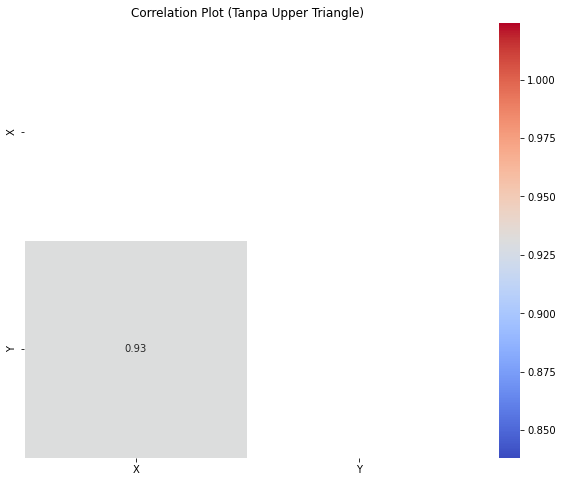

In [23]:
# Membuat mask untuk upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Membuat heatmap tanpa upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot (Tanpa Upper Triangle)')
plt.show()


Membuat model regresi sederhana

<AxesSubplot:xlabel='X', ylabel='Y'>

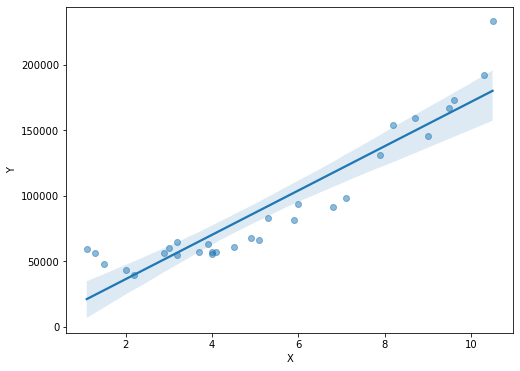

In [24]:
# Plot scatterplot dengan regresi
plt.figure(figsize=(8, 6))
sns.regplot(x="X", y="Y", data=data, scatter_kws={"alpha": 0.5})


Membuat Model Regresi Sederhana

In [7]:
from sklearn.linear_model import LinearRegression

In [26]:
# Pisahkan variabel independen (X) dan dependen (Y)
X = data[["X"]]  # Perlu diubah ke bentuk 2D
Y = data["Y"]


# Menambahkan konstanta ke model (intercept)
X = sm.add_constant(X)


In [27]:
X

,const,X
0,1.0,1.1
1,1.0,1.3
2,1.0,1.5
3,1.0,2.0
4,1.0,2.2
5,1.0,2.9
6,1.0,3.0
7,1.0,3.2
8,1.0,3.2
9,1.0,3.7


In [28]:

# Membuat model regresi linear
model = sm.OLS(Y, X).fit()

# Melihat ringkasan model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     182.8
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           8.52e-14
Time:                        20:45:01   Log-Likelihood:                -337.25
No. Observations:                  30   AIC:                             678.5
Df Residuals:                      28   BIC:                             681.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2604.7666   7499.990      0.347      0.731   -1.28e+04     1.8e+04
X           1.689e+04   1249.709     13.519      0.000    1.43e+04    1.95e+04
==============================================================================
Omnibus:                        6.618   Durbin-Watson:                   0.426
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                4.973
Skew:                           0.938   Prob(JB):                       0.0832
Kurtosis:                       3.677   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
print(model)

In [29]:
prediksi = model.predict(X)
prediksi

0      21188.466084
1      24567.320542
2      27946.175000
3      36393.311145
4      39772.165603
5      51598.156206
6      53287.583435
7      56666.437893
8      56666.437893
9      65113.574038
10     68492.428496
11     70181.855725
12     70181.855725
13     71871.282954
14     78628.991871
15     85386.700787
16     88765.555245
17     92144.409703
18    102280.973077
19    103970.400306
20    117485.818138
21    122554.099825
22    136069.517658
23    141137.799345
24    149584.935490
25    154653.217177
26    163100.353322
27    164789.780551
28    176615.771154
29    179994.625612
dtype: float64

Visualisasi hasil prediksi

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

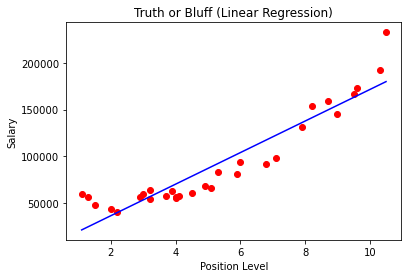

In [37]:
plt.scatter(X.X, Y, color = 'red')
plt.plot(X.X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Evaluasi

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
# Evaluasi model
mse = mean_squared_error(Y, prediksi)
mae = mean_absolute_error(Y, prediksi)
r2 = r2_score(Y, prediksi)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 340442063.2173
Mean Absolute Error (MAE): 14626.6079
R-squared (R²): 0.8671


# Membuat Model Model Regresi Polynomial

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression()

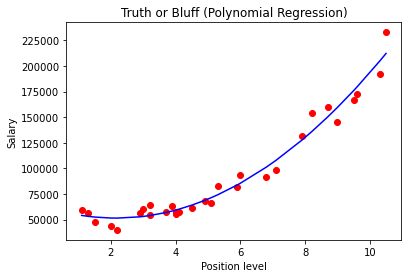

In [67]:
plt.scatter(X.X, Y, color = 'red')
plt.plot(X.X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [69]:
Y_poly = lin_reg_2.predict(X_poly)
Y_poly

array([ 54050.23016874,  53156.98501928,  52448.83938167,  51488.28565194,
        51427.98830577,  52674.6062499 ,  53037.79403947,  53902.9942525 ,
        53902.9942525 ,  56875.80514936,  58388.85365383,  59214.790223  ,
        59214.790223  ,  60087.00167013,  64038.59623826,  68730.58885374,
        71354.23442924,  74162.97951659,  83699.81184965,  85451.24597802,
       101128.61461154, 107771.16333545, 127520.72122944, 135690.34092603,
       150231.87131287, 159512.08808049, 175904.61358573, 179321.94332066,
       204538.94804803, 212160.2804432 ])

In [70]:
# Evaluasi model
mse_poly = mean_squared_error(Y, Y_poly)
mae_poly = mean_absolute_error(Y, Y_poly)
r2_poly = r2_score(Y, Y_poly)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE Poly): {mse_poly:.4f}")
print(f"Mean Absolute Error (MAE Poly): {mae_poly:.4f}")
print(f"R-squared (R² Poly): {r2_poly:.4f}")


Mean Squared Error (MSE Poly): 72622906.4088
Mean Absolute Error (MAE Poly): 6991.6199
R-squared (R² Poly): 0.9717
